Індивідуальне завдання 3, Кузенко, варіант 8

1 завдання

In [1]:

# імпорт необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import scipy.stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import geom

In [2]:
# завантаження файлу зі всіма варіантами data_variants.xlsx
from google.colab import files
uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('data_variants.xlsx', name)

ModuleNotFoundError: No module named 'google'

In [ ]:
# дані
data_variants = pd.read_excel('data_variants.xlsx')
data_variants

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12
0,0.175,0.662,6.133,0.505,0.566,-3.795,0.675,-10.000,4.990,0.064,-1.569,4.736
1,0.609,0.468,7.459,0.318,0.753,1.349,0.386,16.967,5.919,0.240,-3.235,-0.127
2,0.330,0.430,1.887,0.623,0.731,3.216,0.513,-2.405,2.818,0.292,2.869,5.775
3,0.275,0.296,5.260,0.204,0.805,-0.871,0.214,2.132,3.820,0.233,7.578,3.599
4,0.441,0.597,6.442,0.302,0.757,2.180,0.671,-2.154,6.524,0.352,5.000,10.965
...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.315,0.767,8.489,0.592,0.358,-1.610,0.873,1.161,3.388,0.191,0.573,7.599
106,0.529,0.527,-1.121,0.178,0.818,2.302,0.318,2.453,3.316,0.309,2.282,5.659
107,0.210,0.609,11.658,0.354,0.653,2.721,0.499,8.449,6.267,0.090,9.104,9.125
108,0.420,0.803,2.574,0.478,0.391,1.743,0.474,4.383,1.944,0.490,8.791,6.237


In [ ]:
my_variant = data_variants['Var8']
my_variant

0     -10.000
1      16.967
2      -2.405
3       2.132
4      -2.154
        ...  
105     1.161
106     2.453
107     8.449
108     4.383
109     5.728
Name: Var8, Length: 110, dtype: float64

In [ ]:
my_variant.describe()

count    110.000000
mean       2.406964
std        6.784138
min      -13.743000
25%       -1.506250
50%        2.374500
75%        5.908750
max       23.868000
Name: Var8, dtype: float64

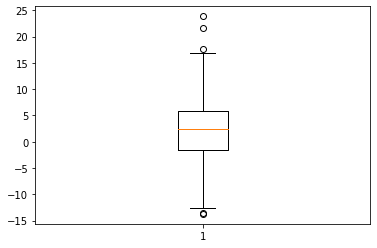

In [ ]:
plot.boxplot(my_variant)
plot.show()

(array([0.01208544, 0.01450253, 0.03142214, 0.04592467, 0.07492972,
        0.05801011, 0.00725126, 0.01208544, 0.00483418, 0.00483418]),
 array([-13.743 ,  -9.9819,  -6.2208,  -2.4597,   1.3014,   5.0625,
          8.8236,  12.5847,  16.3458,  20.1069,  23.868 ]),
 <a list of 10 Patch objects>)

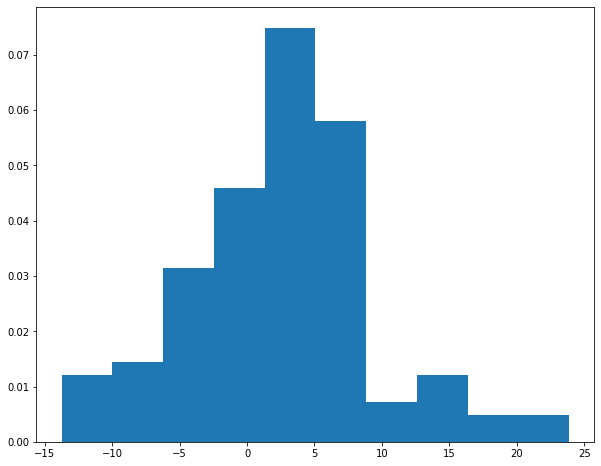

In [ ]:
plot.subplots(figsize=(10,8))
plot.hist(my_variant, density=True)

In [ ]:
# обчислюємо параметри для нормального розподілу
# ці дані також можна взяти з describe (трошки вище)
a, sigma  =scipy.stats.distributions.norm.fit(my_variant)
a, sigma

(2.4069636363636366, 6.753230634198546)

In [ ]:
# визначаємо значення на ОХ: від 15 до 25
ix = np.linspace(-15,25,10)
ix

array([-15.        , -10.55555556,  -6.11111111,  -1.66666667,
         2.77777778,   7.22222222,  11.66666667,  16.11111111,
        20.55555556,  25.        ])

In [ ]:
# обчислюємо значення теоеретичної функції розподілу для підібраних параметрів
N_fitted_my_variant = scipy.stats.distributions.norm.pdf(ix, a, sigma)
N_fitted_my_variant

array([0.00213155, 0.00936185, 0.02666401, 0.04924773, 0.0589853 ,
       0.04581399, 0.02307541, 0.00753698, 0.0015964 , 0.00021927])

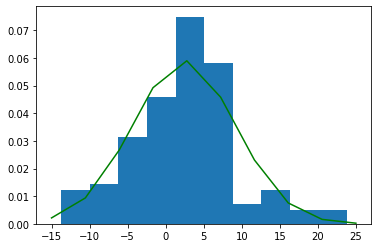

In [ ]:
# гістограма і графік щільності теоретичного розподілу
plot.hist(my_variant, density=True)
plot.plot(ix,N_fitted_my_variant,'g')

In [ ]:
# обчислюємо параметри для Стьюдент розподілу
x, loc, scale  =scipy.stats.distributions.t.fit(my_variant)
x, loc, scale

(4.693249521594579, 2.32841412453147, 5.296313993836915)

In [ ]:
# визначаємо значення на ОХ: від -15 до 25
Ox = np.linspace(-15,25,10)

In [ ]:
# обчислюємо значення теоеретичної функції розподілу для підібраних параметрів
t_fitted_my_variant = scipy.stats.distributions.t.pdf(Ox, x, loc, scale)
t_fitted_my_variant

array([0.00242745, 0.00700594, 0.0208616 , 0.05158229, 0.0711335 ,
       0.04439574, 0.01681238, 0.0056199 , 0.00198113, 0.00077296])

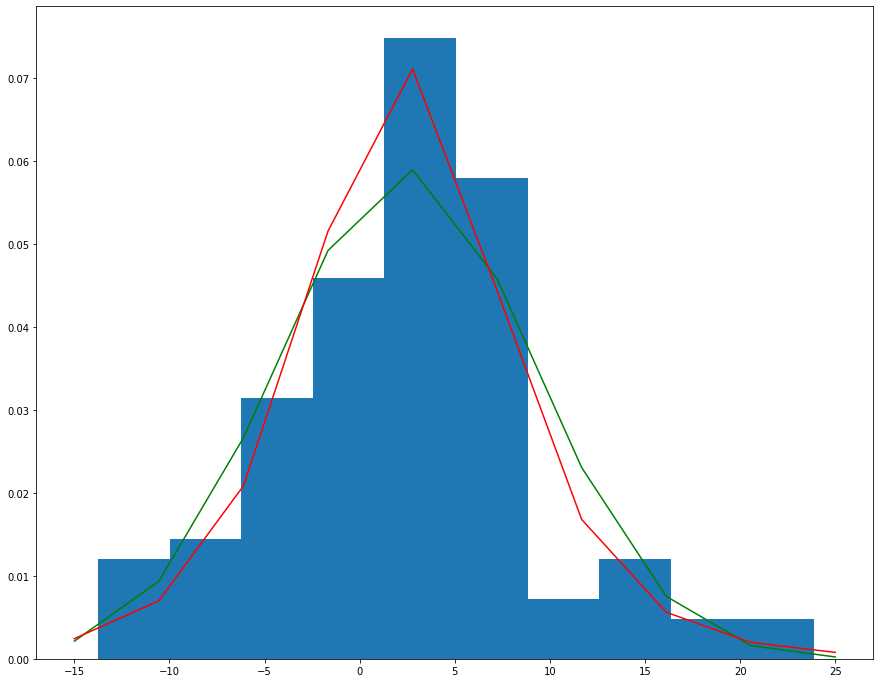

In [ ]:
# будуємо на одному графіку гістограму і щільність теоретичного розподілу
plot.subplots(figsize=(15,12))
plot.hist(my_variant, density=True)
plot.plot(ix,N_fitted_my_variant,'g')
plot.plot(Ox,t_fitted_my_variant,'r')

2. Знайти методом максимальної правдоподібності за вибіркою
 3,5,7,8,9
оцінку параметра для геометричного розподілу. 
 . 


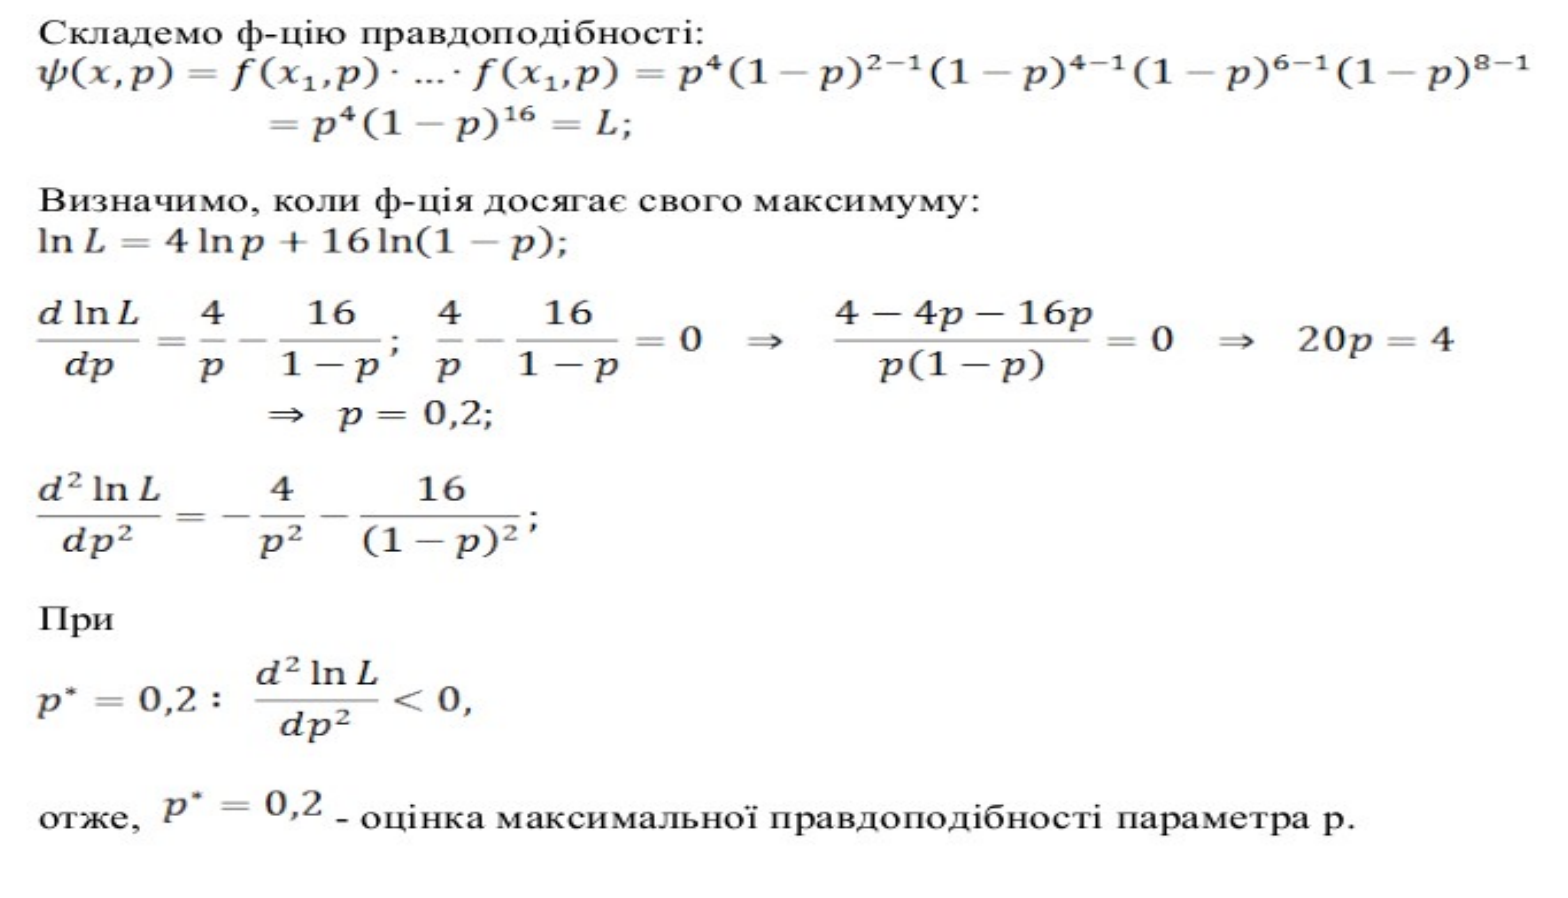

In [ ]:
proba=pd.Series([3, 5, 7, 8, 9])
proba

0    3
1    5
2    7
3    8
4    9
dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


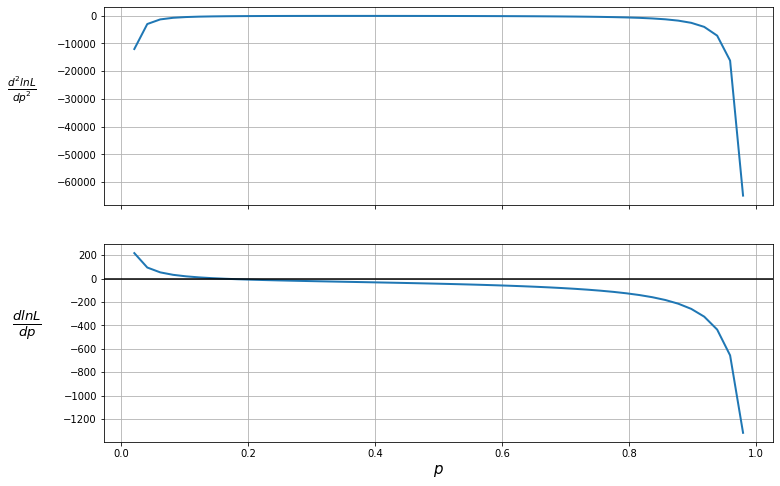

In [ ]:
P = np.linspace(0, 1)
L = P**(5) * (1-P)**(3-1) * (1-P)**(5-1) * (1-P)**(7-1) * (1-P)**(8-1) * (1-P)**(9-1)
lnL = 5*np.log(P) + 27*np.log(1-P)
dlnL = 5/P - 27/(1-P) 
d2lnL = -5/(P)**2 - 27/(1-P)**2

fig, (ax1, ax2) = plot.subplots(2, sharex=True, figsize=(12, 8))

ax1.plot(P, d2lnL, lw=2)
ax2.plot(P, dlnL, lw=2)

ax1.set_ylabel(r'$\frac{d^{2}lnL}{dp^{2}}$',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax2.set_ylabel(r'$\frac{dlnL}{dp}$ ',
               rotation=0,
               labelpad=35,
               fontsize=19)
ax2.set_xlabel(r'$p$', fontsize=15)
ax1.grid(), ax2.grid()
plot.axhline(c='black')
plot.show()


In [ ]:
from sympy import *
x = symbols('x')
p = solve(Eq(5/x - 27/(1-x),0), x)  
print("p = ") 
p 

p = 


[5/32]

Виідповідь: 5/32 = 0.15625

3. Знайти методом моментів оцінку параметра  для геометричного розподілу, якщо у шістьох випробуваннях подія зявилась відповідно після двох, трьох, пяти, семи,  восьми та дев’яти експериментів.

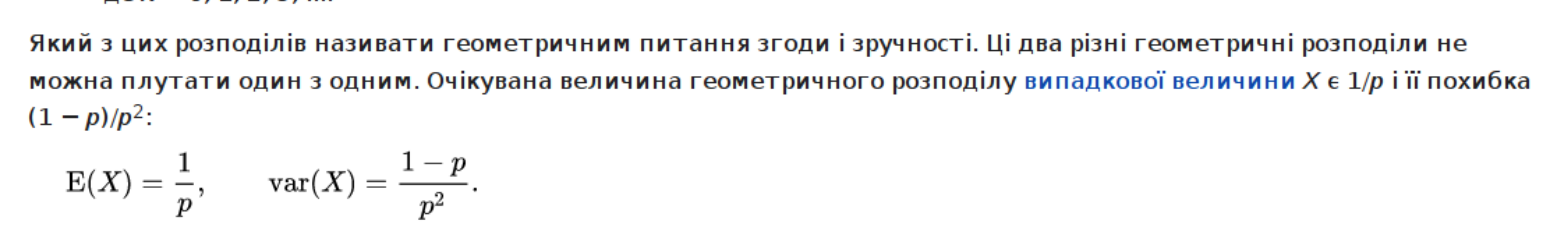

In [ ]:
xAverage = (2 + 3 + 5 + 7 + 8 + 9)/6
p = 1/xAverage
print("p = ")
p 

p = 


0.1764705882352941

Відповідь: 0.17647

Оцінки, знайдені різними методами трохи відрізняються (на 0.02), але не суттєво.